<h1 align="center" style="background-color:black;color:white;border-radius: 8px; padding:15px">T-Shirt Sleeve Classification using Convolutional Neural Networks</h1>

<h3 style="background-color:black;color:white;border-radius: 8px; padding:15px">1. Import required libraries</h3>

In [225]:
import os
import random 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F

random_seed=42
torch.manual_seed(random_seed);

<h3 style="background-color:black;color:white;border-radius: 8px; padding:15px">2. Load Dataset</h3>

In [101]:
data_path = '/kaggle/input/classify-sleeves-with-tshirt-images'

In [233]:
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((255, 255)),        # Resize images to 256x256
#     transforms.RandomRotation(30),        # Apply random rotation of 30 degrees
    transforms.RandomHorizontalFlip(),    # Apply random horizontal flip
    transforms.ToTensor(),                # Convert the image to a PyTorch Tensor
#     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

In [234]:
dataset = datasets.ImageFolder(root=data_path, transform=transform)

<h3 style="background-color:black;color:white;border-radius: 8px; padding:15px">3. Visualize Dataset</h3>

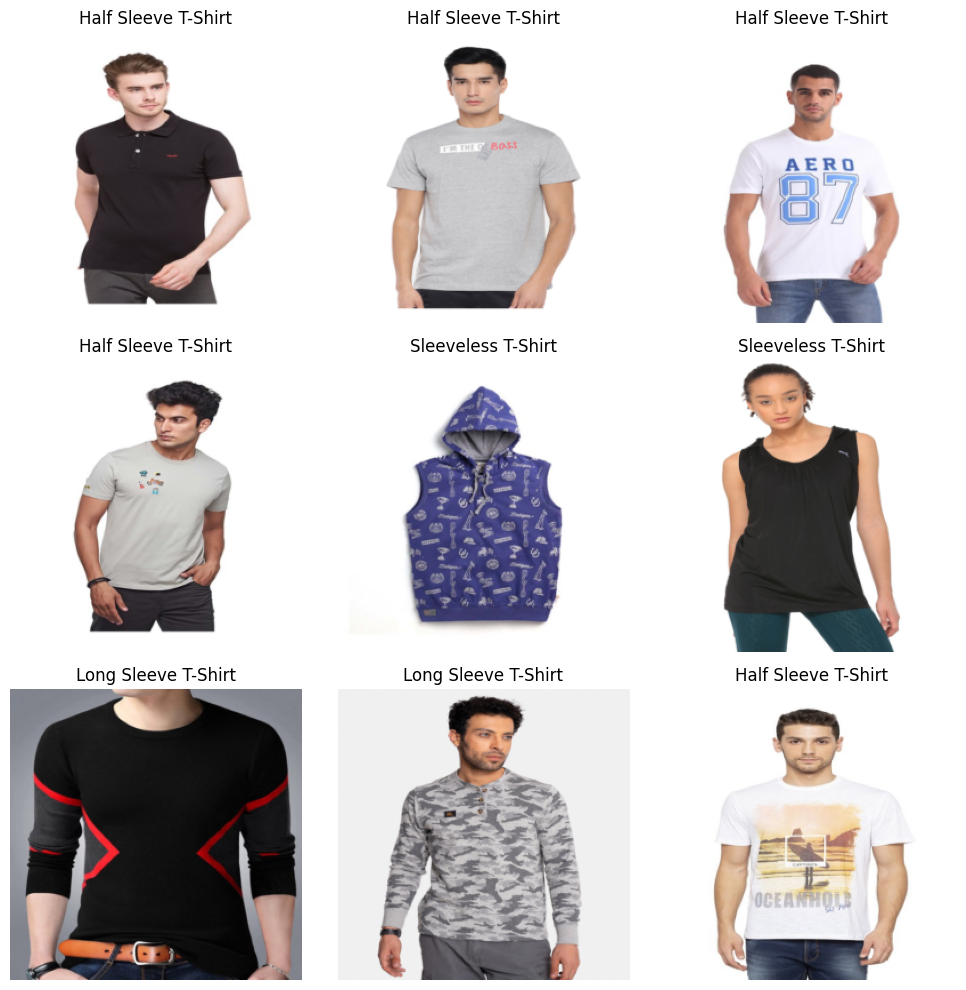

In [236]:
# Class name mapping
class_names = ['Half Sleeve T-Shirt', 'Long Sleeve T-Shirt', 'Sleeveless T-Shirt']

# Function to display 3x3 random images
def display_random_images(dataset, class_names):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()

    # Randomly select 9 images from the dataset
    for i in range(9):
        img_idx = random.randint(0, len(dataset) - 1)
        image, label = dataset[img_idx]
        axes[i].imshow(image.permute(1, 2, 0))  # Change dimension order for imshow
        axes[i].set_title(class_names[label])   # Set class name as the title
        axes[i].axis('off')                     # Disable axis for a cleaner look

    plt.tight_layout()
    plt.show()

# Display 3x3 random images
display_random_images(dataset, class_names)

In [213]:
def imshow_single(image, label):
    label_mapping = {0: 'Half Sleeve T-Shirt', 1: 'Long Sleeve T-Shirt', 2: 'Sleeveless T-Shirt'}
    
#     if isinstance(label, torch.Tensor):
#         label = label.item()
    
    print('Label:', label_mapping[label])
    
    plt.imshow(image.permute(1, 2, 0))  # Ensure correct dimension order for imshow
    plt.axis('off')                     # Disable the axis
    plt.show()

Label: Half Sleeve T-Shirt


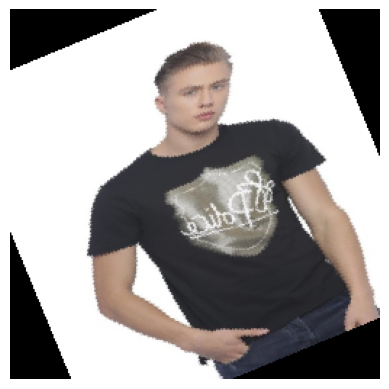

In [214]:
imshow_single(*dataset[0])

<h3 style="background-color:black;color:white;border-radius: 8px; padding:15px">4. Split Data into Train, Val and Test Set</h3>

In [226]:
# Define the sizes for the splits
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [227]:
# Split the dataset into training, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [228]:
# Create DataLoaders for each subset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [229]:
# Example of checking the number of samples in each split
print(f"Training set: {len(train_dataset)} samples")
print(f"Validation set: {len(val_dataset)} samples")
print(f"Test set: {len(test_dataset)} samples")

Training set: 4427 samples
Validation set: 948 samples
Test set: 950 samples
